In [30]:
import croprows_utils as crutils
import croprows_image_preprocessing as crimgprep
import imutils_perspective as imutils

import os
import numpy as np
import sys
import cv2
import math
import matplotlib.pyplot as plt
import re

np.seterr(divide='ignore', invalid='ignore')

import imp 
imp.reload(crutils)
imp.reload(crimgprep)
imp.reload(imutils)

croprows_utils [ module loaded ]
croprows_image_processing [ module loaded ]


<module 'imutils_perspective' from '/home/jovyan/work/src/imutils_perspective.py'>

In [1330]:
#Get OpenCV Version
print(crutils.getOpenCVVersion())

OpenCV version:3.1.0-dev


In [2]:
print(crutils.fileNumberIndex("89_test.jpg"))

test_images = []
index = 0 

path="test_images"
file_list = os.listdir(path)
for filename in sorted(file_list, key = crutils.fileNumberIndex):
    path_file = os.path.join(path,filename);
    test_images.append(path_file)
    print('test_image: ' + str(index) + ' ----> '+  path_file)
    index+=1
        

pixelSize = [0.0185537,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399,
             0.0184399,0.0184399]

xOrigin = [354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653,
           354157.9354649173328653,354157.9354649173328653,354157.9354649173328653]
yOrigin = [379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671,379018.7860411673900671,
           379018.7860411673900671,379018.7860411673900671]

##Images 
## 0 - ok
## 1 - ok
## 2 - ok (check some crop rows - weed mixing)
## 3 - ok ( check some weed near to water drainage)
## 4 - fail (weed and dark water )
## 5 - fail (water )
## 6 - fail (water)
## 7 - fail ( water + soil )
## 8 - fail ( water + soil )
## 9 - fail ( water + soil )
## 10 -fail ( postharvest residues)
try_image = 0 #24# 21 #24 # 5# 26 #15 #21

seed = 4 # 4#3

cmPerPixel = (pixelSize[try_image])*100

89
test_image: 0 ----> test_images/1_image1_20x20.tif
test_image: 1 ----> test_images/10_image10_20x20.tif
test_image: 2 ----> test_images/11_image11_20x20.tif
test_image: 3 ----> test_images/12_image12_20x20.tif
test_image: 4 ----> test_images/13_image13_20x20.tif
test_image: 5 ----> test_images/14_image14_20x20.tif
test_image: 6 ----> test_images/15_image15_20x20.tif
test_image: 7 ----> test_images/16_image16_20x20.tif
test_image: 8 ----> test_images/17_image17_fxf.tif
test_image: 9 ----> test_images/18_test_1.jpg
test_image: 10 ----> test_images/19_test_2.jpg
test_image: 11 ----> test_images/2_image2_20x20.tif
test_image: 12 ----> test_images/20_test_3.jpg
test_image: 13 ----> test_images/21_test_4.jpg
test_image: 14 ----> test_images/22_test_5.JPG
test_image: 15 ----> test_images/23_test_6.jpg
test_image: 16 ----> test_images/24_test_7.jpg
test_image: 17 ----> test_images/25_test_8.jpg
test_image: 18 ----> test_images/26_test_9.jpg
test_image: 19 ----> test_images/27_test_10.jpg
te

<h1>readRGBImageByUrl</h1>

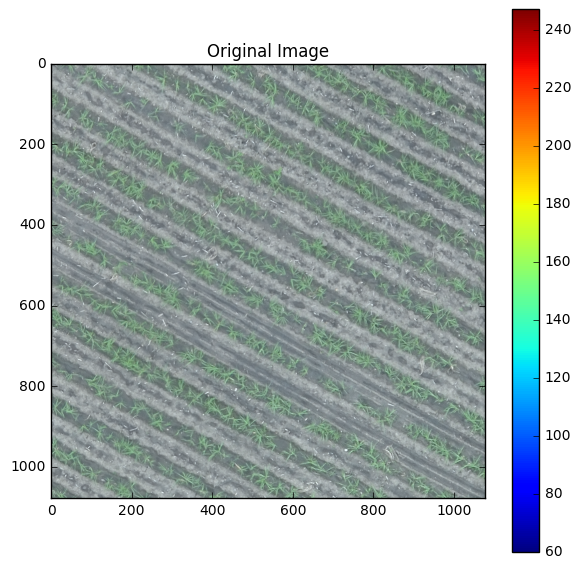

In [3]:
original_image =crimgprep.readRGBImageByUrl(test_images[try_image])
plt.figure(figsize=(7, 7))
plt.title("Original Image")
plt.imshow(original_image)
plt.colorbar()
plt.show()

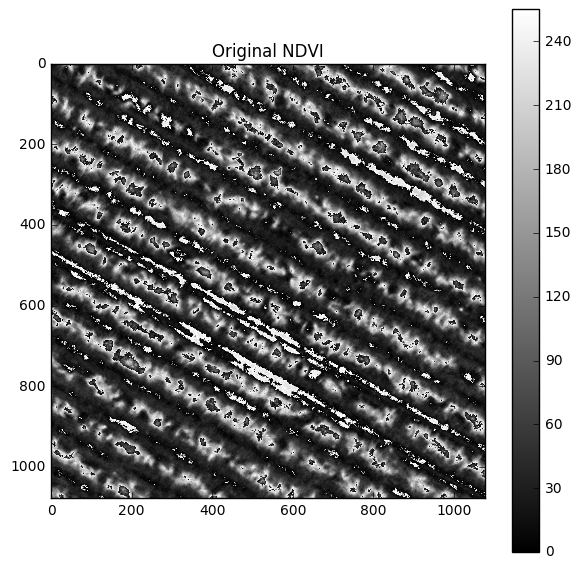

In [34]:
test_image =crimgprep.readRGBImageByUrl(test_images[try_image])
ndvi =crimgprep.calc_NDVI(test_image,'RGB')
plt.figure(figsize=(7, 7))
plt.title("Original NDVI")
plt.imshow(ndvi,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

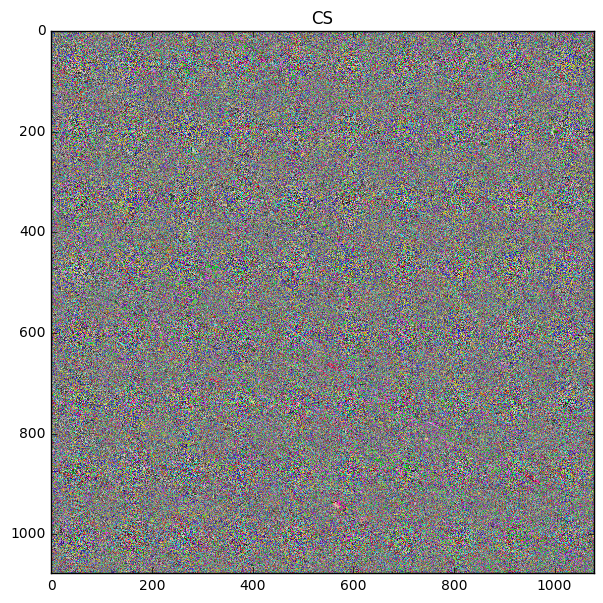

In [32]:
test_image2 =crimgprep.readRGBImageByUrl(test_images[try_image])
cs =crimgprep.contrast_stretch(test_image2)
plt.figure(figsize=(7, 7))
plt.title("CS")
plt.imshow(cs,cmap=plt.get_cmap('gray'))
plt.show()


<h1> Segmentation by Green Colour Detection  </h1>

In [1333]:
green = np.uint8([[[102,255,178 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 45 153 255]]]


<h1>imageGreenMask</h1>

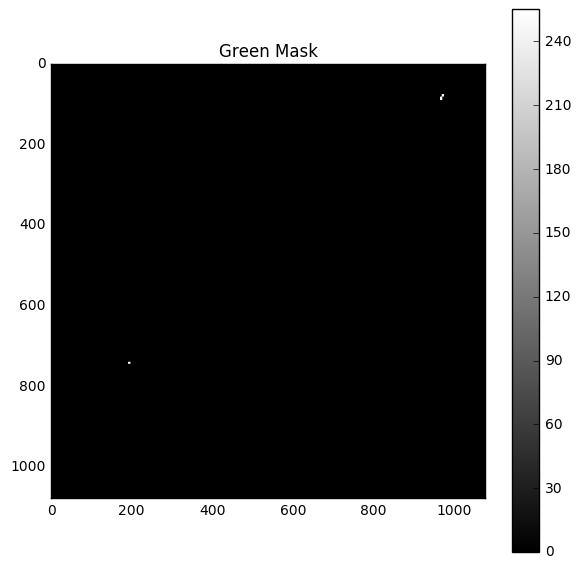

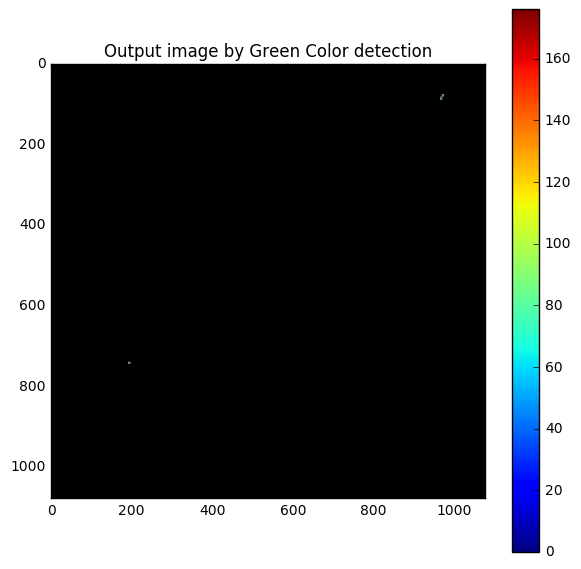

In [1334]:
imgc = original_image.copy()

mask_,output_ =crimgprep.imageGreenMask(imgc)

plt.figure(figsize=(7, 7))
plt.title("Green Mask")
plt.imshow(mask_,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 7))
plt.title("Output image by Green Color detection")
plt.imshow(output_)
plt.colorbar()
plt.show()

<h1>preProcessingPipeline(rgbImage)</h1>

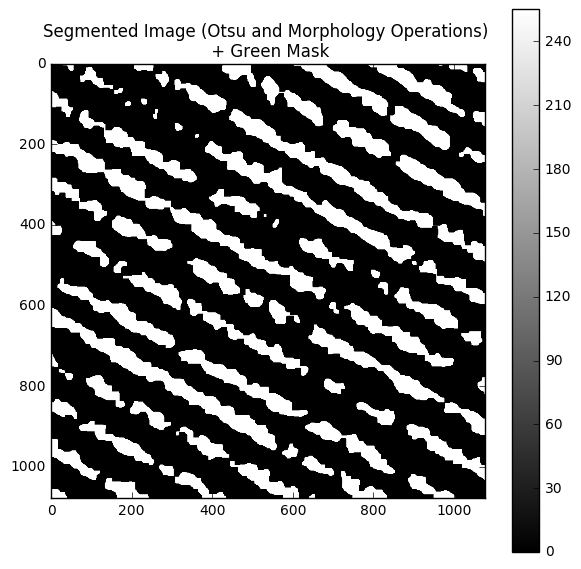

In [1335]:
segmentedImage , rgbImage  = crimgprep.preProcessingPipeline(original_image)

plt.figure(figsize=(7, 7))
plt.title("Segmented Image (Otsu and Morphology Operations) \n + Green Mask")
plt.imshow(segmentedImage,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

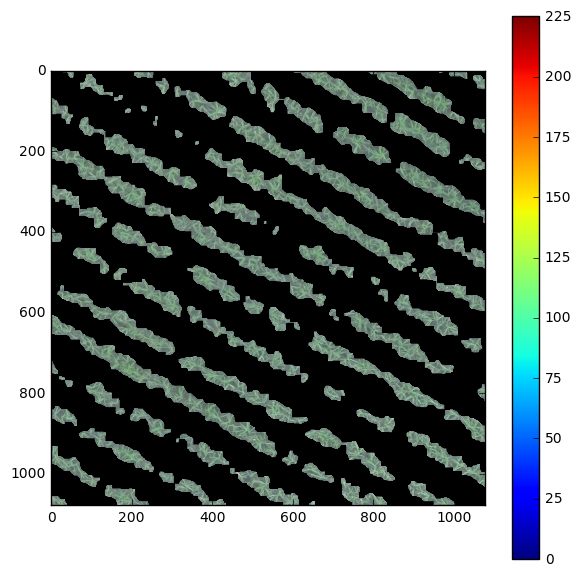

In [1336]:
plt.figure(figsize=(7, 7))
plt.imshow(rgbImage)
plt.colorbar()
plt.show()

<h1>buildContours(segmentedImage, seed , tolerance )</h1>

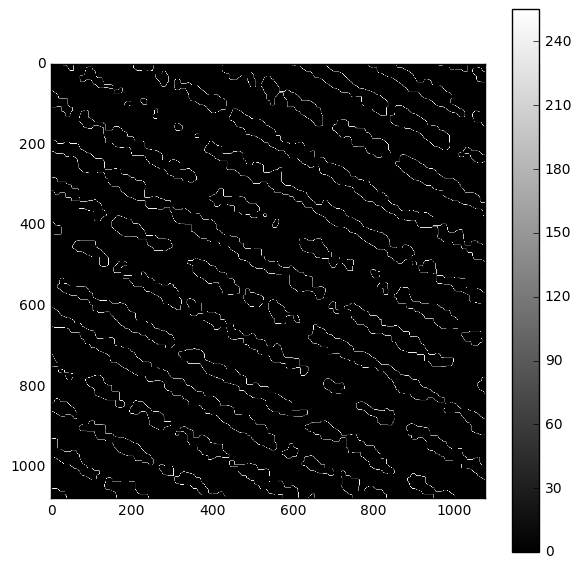

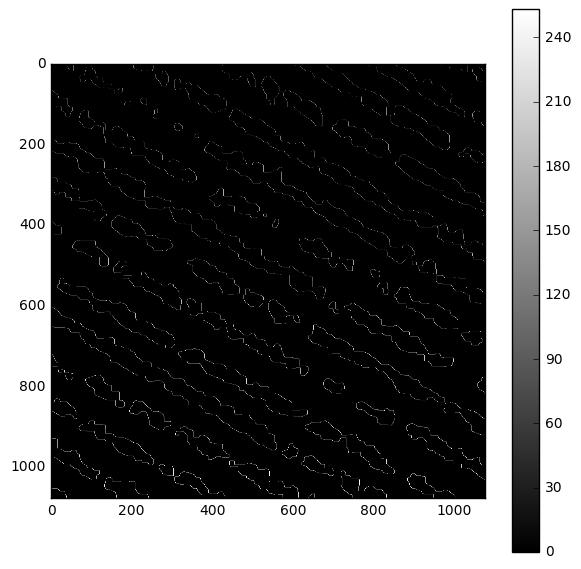

In [1337]:
#########################
##   Seed Cases
##
##   __  case 1
##
##   |   case 2
##   
##   /   case 3
##
##   \   case 4
##
##   O   case -1 auto search 
##
#########################
## Tolerance +/- in degrees
#########################
    
img_edges, img_contours , contoursAll, contoursFiltred,\
angleFitMinAreaRect , meanAngleFitMinAreaRect , angleFitElipseContours , meanAngleFitElipseContours = crimgprep.buildContours(segmentedImage,seed,5)


plt.figure(figsize=(7, 7))
plt.imshow(img_edges,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(img_contours,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()


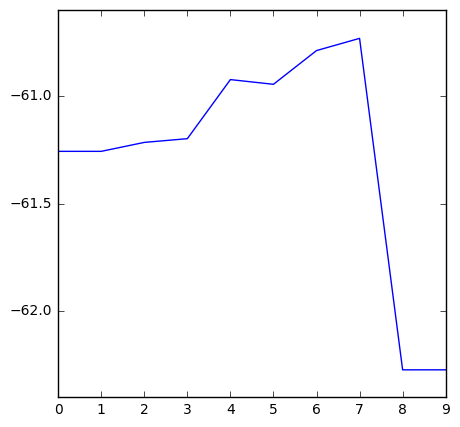

[-61.2568473815918, -61.2568473815918, -61.21529006958008, -61.197975158691406, -60.92353439331055, -60.94538879394531, -60.78871154785156, -60.73200607299805, -62.271751403808594, -62.27173614501953]
MEAN: ANGLE CONTOURS -61.2860088348


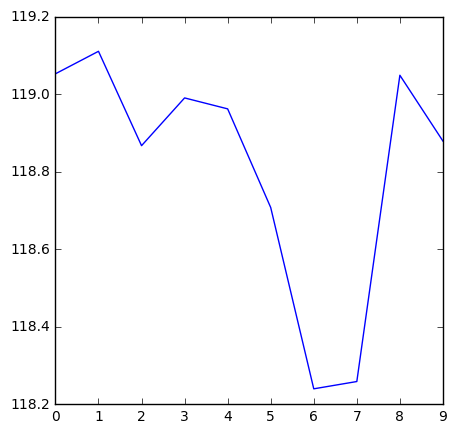

[119.05329132080078, 119.111328125, 118.86780548095703, 118.99103546142578, 118.9627685546875, 118.70819091796875, 118.24031066894531, 118.25914764404297, 119.04953002929688, 118.87966918945312]
MEAN: ANGLE ELIPSE 118.812307739


In [1338]:
plt.figure(figsize=(5, 5))
plt.plot(angleFitMinAreaRect)
plt.show()

print(angleFitMinAreaRect)
print('MEAN: ANGLE CONTOURS ' + str(meanAngleFitMinAreaRect) )


plt.figure(figsize=(5, 5))
plt.plot(angleFitElipseContours)
plt.show()

print(angleFitElipseContours)
print('MEAN: ANGLE ELIPSE ' + str(meanAngleFitElipseContours) )



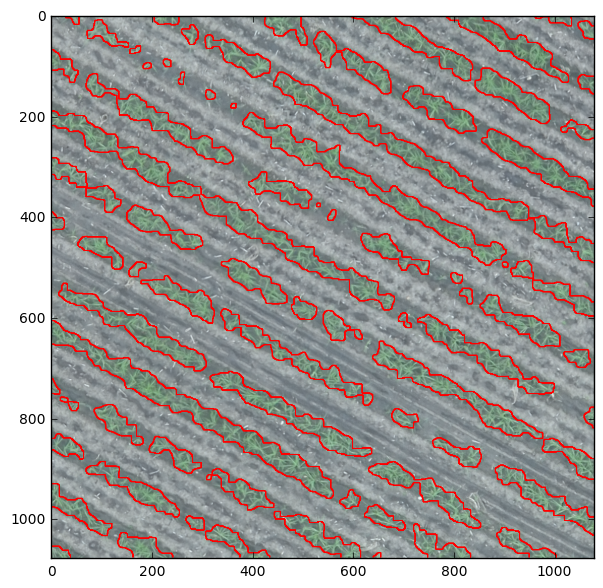

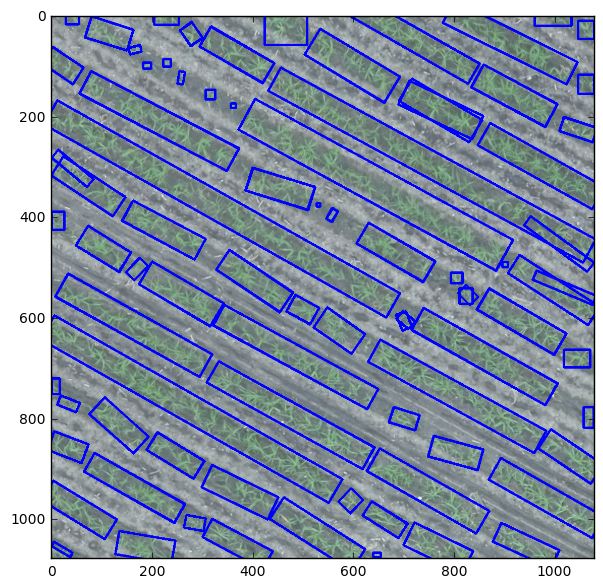

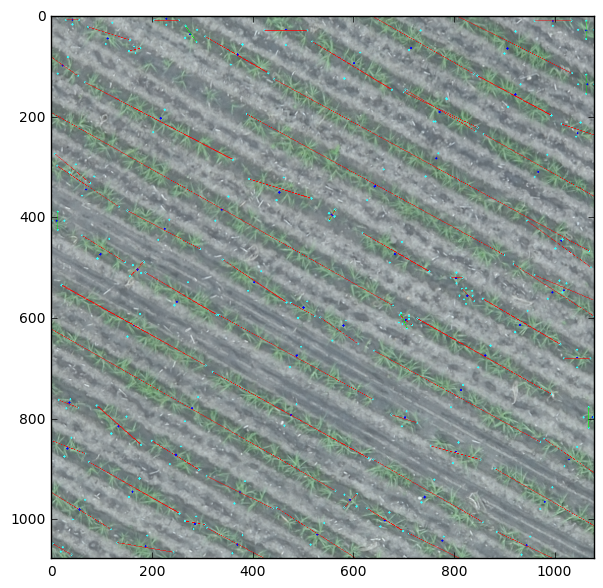

In [1339]:
im = original_image.copy()
ck , smal , geomes = crimgprep.drawContours(im, contoursAll)

plt.figure(figsize=(7, 7))
plt.imshow(ck,cmap=plt.get_cmap('gray'))
plt.show() 

plt.figure(figsize=(7, 7))
plt.imshow(smal,cmap=plt.get_cmap('gray'))
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(geomes,cmap=plt.get_cmap('gray'))
plt.show()

In [1340]:
#copy_autocanny = img_edges.copy()

#build Contours
#img2, contours, hierarchy = cv2.findContours(copy_autocanny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#plt.figure(figsize=(7, 7))
#plt.imshow(img2,cmap=plt.get_cmap('gray'))
#plt.show()

#imgcont = cv2.drawContours(copy_autocanny, contours, -1, (255,255,255), 3)
#plt.figure(figsize=(5, 5))
#plt.imshow(imgcont,cmap=plt.get_cmap('gray'))
#plt.show()

118.812307739
LINESTRING(354153.645791 379027.839169 , 354186.159412 379009.955558)
LINESTRING(354142.031174 379027.969045 , 354174.544796 379010.085434)
LINESTRING(354145.148196 379028.173135 , 354177.661818 379010.289524)
LINESTRING(354159.156239 379028.210243 , 354191.669861 379010.326632)
LINESTRING(354148.524969 379028.228797 , 354181.038591 379010.345186)
LINESTRING(354156.057772 379028.377226 , 354188.571393 379010.493615)
LINESTRING(354146.966459 379029.008052 , 354179.48008 379011.124441)
LINESTRING(354146.966459 379028.989498 , 354179.48008 379011.105887)
LINESTRING(354151.456454 379028.599871 , 354183.970076 379010.71626)
LINESTRING(354153.94265 379029.119374 , 354186.456271 379011.235763)
LINESTRING(354153.94265 379029.119374 , 354186.456271 379011.235763)
LINESTRING(354152.662444 379029.880076 , 354185.176066 379011.996465)
LINESTRING(354152.662444 379029.880076 , 354185.176066 379011.996465)
LINESTRING(354142.717661 379029.527556 , 354175.231283 379011.643945)
LINESTRING(

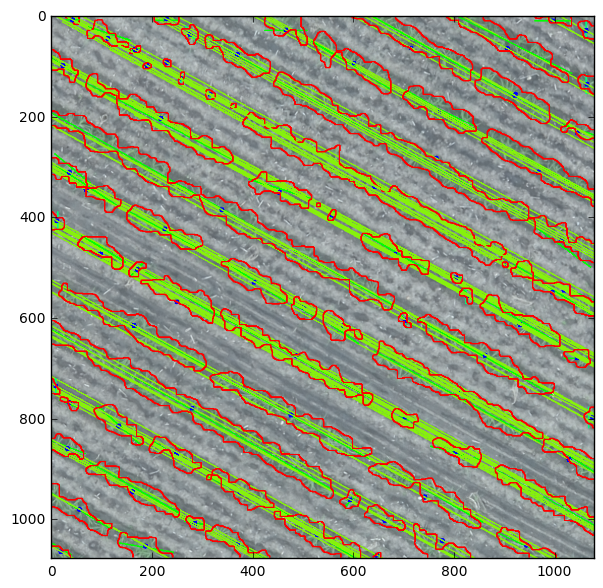

In [1353]:
print(meanAngleFitElipseContours)

cp_image = original_image.copy()

m_linealma = []

lineId = 0

#for cc in contoursFiltred:
for cc in contoursAll:
    # find minimum area
    rect = cv2.minAreaRect(cc)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    x_,y_,w_,h_ = cv2.boundingRect(box)
    box = imutils.order_points(box)
    #print(box)
    
    ##Draw Contour
    cv2.drawContours(cp_image, contoursAll, -1, (255, 0, 0), 2)
    
    (tl, tr, br, bl) = box # (top left, top right, bottom right, bottom left)
        
    #print(tl)
    (tltrX, tltrY) = crutils.midPoint(tl, tr)  #PUNTO MEDIO ENTRE TOPLEFT Y TOPRIGHT
    (blbrX, blbrY) = crutils.midPoint(bl, br)  #PUNTO MEDIO ENTRE BOTTOMLEFT Y BOTTOMRIGHT
    (tlblX, tlblY) = crutils.midPoint(tl, bl) #PUNTO MEDIO ENTRE TOPLEFT Y BOTTOMLEFT
    (trbrX, trbrY) = crutils.midPoint(tr, br) #PUNTO MEDIO ENTRE TOPRIGHT Y BOTTOMRIGHT
    
    distance_1 = math.sqrt(((tltrX-blbrX)**2)+((tltrY-blbrY)**2))
    distance_2 = math.sqrt(((tlblX-trbrX)**2)+((tlblY-trbrY)**2))
    if(distance_1 >= distance_2 ):
        cv2.line(cp_image, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(0, 255, 126), 2)
        m_lineal = distance_1
    else:
        cv2.line(cp_image, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(0, 255, 0), 2)
        m_lineal = distance_2 * cmPerPixel
    
    m_linealma.append(m_lineal)
    
    (x,y),radius = cv2.minEnclosingCircle(cc)
    center = (int(x),int(y))
    cv2.circle(cp_image,center, 5, (0,0,255), -1)
    
    #print('centers')
    #print(center)
    
    
    #theta = ((meanAngleFitElipseContours-90)*np.pi / 180)
    theta = ((meanAngleFitElipseContours)*np.pi / 180)
    (x1p,y1p)=(center)
    
    
  
    
    #x2p = x1p + 1000 * np.cos(theta)
    #y2p = y1p + 1000 * np.sin(theta)
    
    #cv2.line(cp_image, (int(x1p), int(y1p)) , (int(x2p), int(y2p)),(134, 241, 12), 2)
    
    rho = 1
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0  = a*rho
    y0  = b*rho
    
    x1p2 = x1p + 1000 * (-b)
    y1p2 = y1p + 1000 * (a)
    x2p2 = x1p - 1000 * (-b)
    y2p2 = y1p - 1000 * (a)
    
    cv2.line(cp_image, (int(x1p2), int(y1p2)) , (int(x2p2), int(y2p2)),(134, 241, 12), 2)
    
    
    ##limit this coordinates by box area 
    #print(""+str(x1p2)+","+str(y1p2)+","+str(x2p2)+","+str(y2p2))
    
    dlx=(x1p2/ (1/(cmPerPixel/100)))
    dly=(y1p2/ (1/(cmPerPixel/100))) 
    drx=(x2p2/ (1/(cmPerPixel/100)))
    dry=(y2p2/ (1/(cmPerPixel/100))) 
            
    yy = (1078  / (1/(cmPerPixel/100)))
    
    
        
    #str(lineId)
    print('LINESTRING('+str( 1.0* (dlx + xOrigin[try_image])) +' '+str( -1.0* (dly - yOrigin[try_image] ) + yy )
                         +' , '+str( 1.0* (drx + xOrigin[try_image])) +' '+str( -1.0* (dry - yOrigin[try_image] ) + yy  )+ ')')
            
    lineId +=1
    
    #https://medium.com/@esmat.anis/robust-extrapolation-of-lines-in-video-using-linear-hough-transform-edd39d642ddf
    ##https://github.com/mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV

#get the largest line

#print(np.amax(m_linealma))


#furrowDistanceM=1.75
#xi=181
#yi=366

#xf=332
#yf=266


#distance_if = math.sqrt(((xf-xi)**2)+((yf-yi)**2))
#print(distance_if)


#for x in crutils.setRange(xi, 500, 30):
#    x1=x
#    y1=0
    #print(x1)
    #theta = ((166.013327026-90)*np.pi / 180)
    #x2 = x1 + 1000 * np.cos(theta)
    #y2 = y1 + 1000 * np.sin(theta)
    #cv2.line(cp_image, (int(x1), int(y1)), (int(x2), int(y2)),(0, 241, 12), 2)
    
    
plt.figure(figsize=(7, 7))
plt.imshow(cp_image,cmap=plt.get_cmap('gray'))
plt.show()

In [1342]:
#def Pixel2World (  i , j ):
#    ulX = 354157.9354649173328653
#    ulY = 379018.7860411673900671
#    xDist = 1078
#    yDist = 1078
#    return(1.0 * i * xDist  + ulX, -1.0 * j * xDist + ulY)
#
#print(Pixel2World(0,0))
    


In [1343]:
#autocanny_canny = img_contours.copy()
#img2, contours, hierarchy = cv2.findContours(autocanny_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#print(hierarchy)


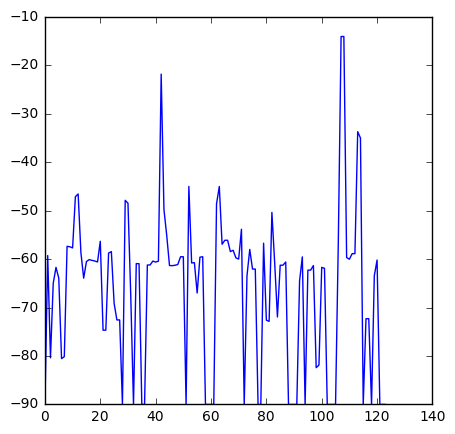

-66.1650653962
LINESTRING(354157.991126 379019.314822 , 354158.677613 379018.90664)
LINESTRING(354160.366 379019.361206 , 354162.42546 379019.008686)
LINESTRING(354174.327659 379019.741557 , 354176.461334 379018.748934)
LINESTRING(354163.677835 379019.899263 , 354165.895002 379018.711826)
LINESTRING(354171.090038 379019.685896 , 354173.242267 379018.628335)
LINESTRING(354162.861472 379020.149738 , 354163.57579 379020.019862)
LINESTRING(354162.861472 379020.149738 , 354163.57579 379020.019862)
LINESTRING(354166.228969 379020.632134 , 354169.225391 379018.721103)
LINESTRING(354169.550081 379020.622857 , 354170.867394 379019.787941)
LINESTRING(354169.550081 379020.622857 , 354170.867394 379019.797218)
LINESTRING(354168.715165 379020.650688 , 354169.179007 379021.151638)
LINESTRING(354168.715165 379020.659965 , 354169.179007 379021.151638)
LINESTRING(354157.796312 379021.281514 , 354160.124802 379019.852879)
LINESTRING(354163.659281 379021.810294 , 354166.089816 379020.622857)
LINESTRING(3

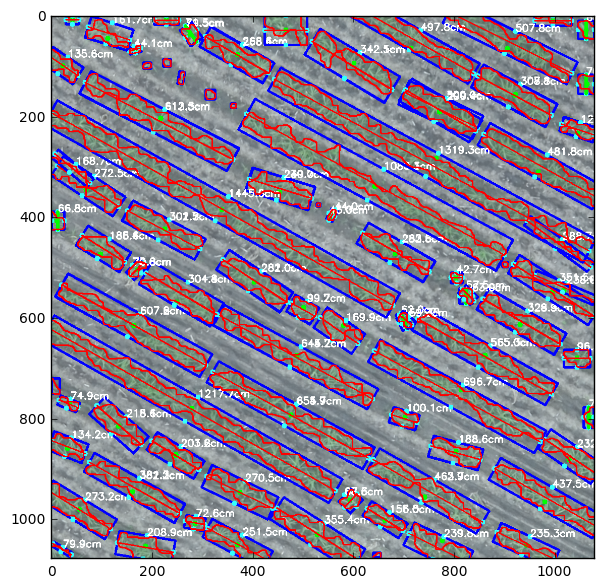

In [1344]:

autocanny_canny = img_edges.copy()
image_rgb = original_image.copy()


img2, contours, hierarchy = cv2.findContours(autocanny_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

anglex = []
for cc in contours:
    rectc = cv2.minAreaRect(cc)
    boxc = cv2.boxPoints(rectc)
    angle_c = cv2.minAreaRect(boxc)[-1]
    anglex.append(angle_c)

angle_mean = (np.mean(anglex))

plt.figure(figsize=(5, 5))
plt.plot(anglex)
plt.show()


afilter = 10
bfilter = 50

prom=angle_mean

print(prom)

    
for c in contours:
    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    x_,y_,w_,h_ = cv2.boundingRect(box)
    
    angle_ = cv2.minAreaRect(box)[-1]
    
    box = imutils.order_points(box)
        
        
    # normalize coordinates to integers
    box = np.int0(box)
   
    
    ##Draw Contour
    cv2.drawContours(image_rgb, contours, -1, (255, 0, 0), 2)
    
    ##Draw Box 
    boxsmall = [box]
    #print(boxoriginal)
    cv2.drawContours(image_rgb, boxsmall , 0, (0,0, 255), 3)
    
    ##Rotate box
    #rows,cols = box.shape[0], box.shape[1]
    #M = cv2.getRotationMatrix2D((cols/2,rows/2),prom,1)
    #img_rot = cv2.warpAffine(image_rgb,M,(cols,rows))
    #cv2.drawContours(image_rgb, img_rot , 0, (0,23, 255), 3)
    
    # rotate bounding box
    #rect0 = (rect[0], rect[1], 0.0)
    #box_ = cv2.boxPoints(rect)
    
    if w_ > 20:
        (x,y),radius = cv2.minEnclosingCircle(c)
        center = (int(x),int(y))
        radius = int(radius)

        #angle_rota = 90 #(-(angle_) + (prom))
        #M = cv2.getRotationMatrix2D(center,angle_rota,1)
        #pts = np.int0(cv2.transform(np.array(boxoriginal), M))[0]
        #cv2.drawContours(image_rgb, [pts] , 0, (125,255, 125), 3)

        #mass center
        cv2.circle(image_rgb,center, 5, (0,255,0), -1)

        theta = (np.pi/180.0)
        x2 = x + 1000 * np.cos(theta)
        y2 = y + 1000 * np.sin(theta) 

        #cv2.line(image_rgb,center,(int(x2),int(y2)),(255,125,0),3)
        
        
        (tl, tr, br, bl) = box # (top left, top right, bottom right, bottom left)
        
        #print(tl)
        (tltrX, tltrY) = crutils.midPoint(tl, tr)  #PUNTO MEDIO ENTRE TOPLEFT Y TOPRIGHT
        (blbrX, blbrY) = crutils.midPoint(bl, br)  #PUNTO MEDIO ENTRE BOTTOMLEFT Y BOTTOMRIGHT

        (tlblX, tlblY) = crutils.midPoint(tl, bl) #PUNTO MEDIO ENTRE TOPLEFT Y BOTTOMLEFT
        (trbrX, trbrY) = crutils.midPoint(tr, br) #PUNTO MEDIO ENTRE TOPRIGHT Y BOTTOMRIGHT
        
        
        cv2.circle(image_rgb,(int(tltrX), int(tltrY)), 5, (51,255,255), -1)
        cv2.circle(image_rgb,(int(blbrX), int(blbrY)), 5, (51,255,255), -1)
        
        cv2.circle(image_rgb,(int(tlblX), int(tlblY)), 5, (51,255,255), -1)
        cv2.circle(image_rgb,(int(trbrX), int(trbrY)), 5, (51,255,255), -1)
        
        #cv2.line(image_rgb, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(0, 255, 0), 4)
        #cv2.line(image_rgb, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 255), 1)
        
        #anglefilter = crutils.angle_between((int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)))
       
        #[vx,vy,x__,y__] = cv2.fitLine(c, cv2.DIST_L2,0,0.01,0.01)
        
        #cv2.line(image_rgb,(x2+vx,y2+vy),(x__,y__),(45,255,0),2)
        
        #lefty = int((-x*vy/vx) + y)
        #righty = int(((cols-x)*vy/vx)+y)
        #cv2.line(image_rgb,(cols-1,righty),(rows,lefty),(45,255,0),2
        
        distance_1 = math.sqrt(((tltrX-blbrX)**2)+((tltrY-blbrY)**2))
        distance_2 = math.sqrt(((tlblX-trbrX)**2)+((tlblY-trbrY)**2))
        if(distance_1 >= distance_2 ):
            cv2.line(image_rgb, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(0, 255, 0), 5)
            m_lineal = distance_1 * cmPerPixel
        else:
            #largest line 
            cv2.line(image_rgb, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 0), 2)
            m_lineal = distance_2 * cmPerPixel
            
           
    
            #ca, cb) = (Pixel2World(tlblX/,tlblY)) 
            #print( (ca,cb))
            
            dlx=(tlblX/ (1/(cmPerPixel/100)))
            dly=(tlblY/ (1/(cmPerPixel/100))) 
            drx=(trbrX/ (1/(cmPerPixel/100)))
            dry=(trbrY/ (1/(cmPerPixel/100))) 
            
            yy = (1078  / (1/(cmPerPixel/100)))
            
            #print(dlx)
            #print(dly)
            #print(drx)
            #print(dry)
            
             ##return(1.0 * i * xDist  + ulX, -1.0 * j * xDist + ulY)
            
            print('LINESTRING('+str( 1.0* (dlx + xOrigin[try_image])) +' '+str( -1.0* (dly - yOrigin[try_image] ) + yy )
                         +' , '+str( 1.0* (drx + xOrigin[try_image])) +' '+str( -1.0* (dry - yOrigin[try_image] ) + yy  )+ ')')
            
        
        
        
        cv2.putText(image_rgb, "{:.1f}cm".format(m_lineal),(int(tltrX), int(tltrY)), 
                    cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)

    
plt.figure(figsize=(7, 7))
plt.imshow(image_rgb,cmap=plt.get_cmap('gray'))
plt.show()   

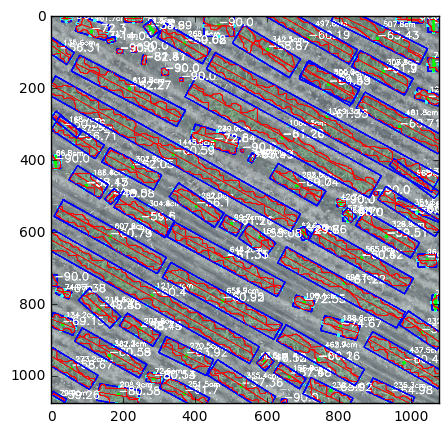

In [1345]:





##############################################
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    
    cv2.rectangle(imgc, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    # find minimum area
    rect = cv2.minAreaRect(c)
    
    area = (w * h)
    if w > afilter or w < bfilter:
        # calculate coordinates of the minimum area rectangle
        box = cv2.boxPoints(rect)
        
        x_,y_,w_,h_ = cv2.boundingRect(box)
        angle_ = cv2.minAreaRect(box)[-1]
            
        # normalize coordinates to integers
        box = np.int0(box)
        
        
        # comentado 
        # draw contours
        #DIBUJO MINIMO CUADRADO
        #cv2.drawContours(imgc, [box], 0, (0,0, 255), 3)
       
        # calculate center and radius of minimum enclosing circle
        (x,y),radius = cv2.minEnclosingCircle(c)
        # cast to integers
        center = (int(x),int(y))
        radius = int(radius)
        # draw the circle
        ##imgcc = cv2.circle(img_read2,center,radius,(0,255,0),2)
        
        ##DIBUJO CONTORNO
        cv2.drawContours(image_rgb, contours, -1, (255, 0, 0), 1)
        
        #[vx,vy,x,y] = cv2.fitLine(contours[0], cv2.DIST_L2,0,0.01,0.01)
        
        #lefty = int((-x*vy/vx) + y)
        #righty = int(((cols-x)*vy/vx)+y)
        #cv2.line(img_read2,(cols-1,righty),(0,lefty),(0,255,0),2)
        
        #cv2.line(img_read2,center,(0,0),(125,0,44),2)
        
        #cv2.circle(imgc,center, 5, (0,255,0), -1)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        #text_out= str(w_)+','+str(h_)+'_'+str(angle_)
        text_out= str(round(angle_,2))
        cv2.putText(image_rgb,text_out,center, font, 1,(255,255,255),2,cv2.LINE_AA)
        
        #print(angle_)
        
        if angle_ > prom:
            #ellipse = cv2.fitEllipse(c)
            #cv2.ellipse(imgc,ellipse,(0,12,124),2)
            
            cv2.drawContours(image_rgb, [box], 0, (0,0, 255), 3)
        
        
        #cv2.line(imgc,center,(0,0),(255,0,0),5)
        
        
        ##CONTOURN Fitting Line
        #rows,cols = c.shape[:2]
        ##print(rows)
        #[vx,vy,x,y] = cv2.fitLine(c, cv2.DIST_L2,0,0.01,0.01)
        #lefty = int((-x*vy/vx) + y)
        #righty = int(((cols-x)*vy/vx)+y)
        #cv2.line(imgc,(cols-1,righty),(rows,lefty),(45,255,0),2)

    
plt.figure(figsize=(5, 5))
plt.imshow(image_rgb,cmap=plt.get_cmap('gray'))
plt.show()


In [1346]:
#I = img_edges.copy()
#h,w = I.shape[:2]
#diff = (3,3,3)
#mask = np.zeros((h+2,w+2),np.uint8)
#cv2.floodFill(I,mask,(0,0), (255,255,255),diff,diff)
#T,I = cv2.threshold(I,180,255,cv2.THRESH_BINARY)
#I = cv2.medianBlur(I, 7)

#totalrice = 0
#oldlinecount = 0
#for y in range(0, h):
#    oldc = 0
#    linecount = 0
#    start = 0   
#    for x in range(0, w):
#        c = I[y,x] < 128;
#        if c == 1 and oldc == 0:
#            start = x
#        if c == 0 and oldc == 1 and (x - start) > 10:
#            linecount += 1
#        oldc = c
#    if oldlinecount != linecount:
#        if linecount < oldlinecount:
#            totalrice += oldlinecount - linecount
#        oldlinecount = linecount
#print(totalrice)

<h1>NO aun </h1>

In [1347]:
def skeletonize(imgg):
    imgg = imgg.copy() # don't clobber original
    skel = imgg.copy()
    skel[:,:] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    while True:
        eroded = cv2.morphologyEx(imgg, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp  = cv2.subtract(imgg, temp)
        skel = cv2.bitwise_or(skel, temp)
        imgg[:,:] = eroded[:,:]
        if cv2.countNonZero(imgg) == 0:
            break
    return skel

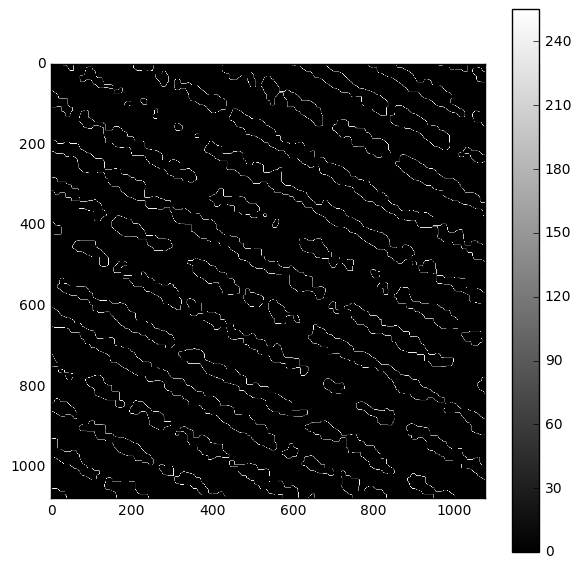

In [1348]:
ske_gradient= skeletonize(img_edges)
plt.figure(figsize=(7, 7))
plt.imshow(ske_gradient,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

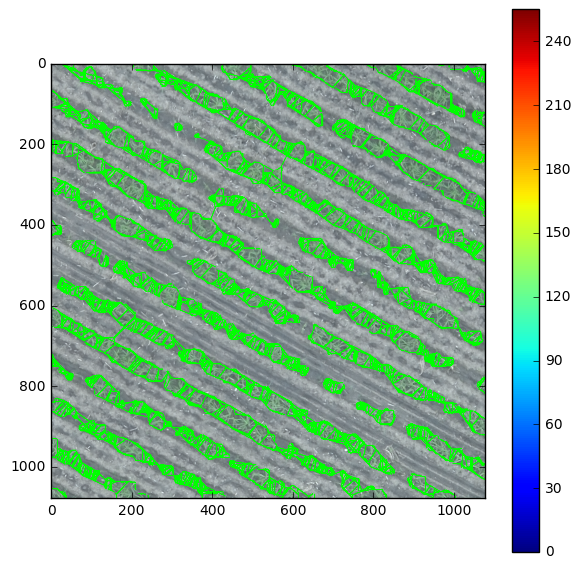

In [1349]:
cpimage = original_image.copy()

minLineLength = 100
maxLineGap = 20
threshold = 1 # was 100
theta = np.pi / 180 # was over 180
lines = cv2.HoughLinesP(ske_gradient, rho=0.2, theta=theta, threshold=threshold,minLineLength=2, maxLineGap=30)

#print(lines)

for line in lines:
    x1, y1, x2, y2 = line[0]
    #print(line[0])
    cv2.line(cpimage, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(7, 7))
plt.imshow(cpimage)
plt.colorbar()
plt.show()

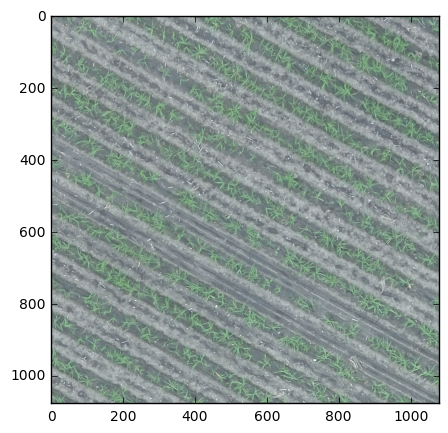

NameError: name 'img_bw' is not defined

In [1350]:
ig=original_image.copy()
plt.figure(figsize=(5, 5))
plt.imshow(ig)
plt.show()

minLineLengthx = 100
maxLineGapx = 10
th = 1
thta = np.pi / 180

lines = cv2.HoughLinesP(img_bw, 0.25, theta=thta, threshold=th, minLineLength=minLineLengthx, maxLineGap=maxLineGapx)

print(lines)

for line in lines:
    x1, y1, x2, y2 = line[0]
    #print(line[0])
    cv2.line(ig, (x1, y1), (x2, y2), (0, 255 ,0), 3)
    print(crutils.angle_between((x1, y1), (x2, y2)))
    #if(angle_between((x1, y1), (x2, y2)) > 10):
    #    cv2.line(imgcp, (x1, y1), (x2, y2), (0, 255,0), 3)
        #print('pasaron:'  + str(angle_between((x1, y1), (x2, y2))))
plt.figure(figsize=(5, 5))
plt.imshow(ig)
plt.show()